In [8]:
import os
import torch
from asteroid.models import BaseModel
import soundfile as sf
import time
import numpy as np
import onnx
import onnxruntime
import matplotlib.pyplot as plt

# 'from_pretrained' automatically uses the right model class (asteroid.models.DPRNNTasNet).
model = BaseModel.from_pretrained('JorisCos/ConvTasNet_Libri2Mix_sepnoisy_16k')
model.cuda()
pass

In [2]:
# model.eval()
# torch.cuda.empty_cache()
# torch.onnx.export(model, torch.rand((1, 1, 300 * 16), device='cuda'),
#                     "conv_tasnet.onnx",
#                     export_params=True,
#                     input_names=['input'],
#                     output_names=['output'],
#                     dynamic_axes={'input': [2], 'output': [2]},
#                     verbose=False,
#                     opset_version=11,
#                     do_constant_folding=True
#                     )

In [3]:
m = onnx.load('conv_tasnet.onnx')
onnx.checker.check_model(m)

In [4]:
resnet_session = onnxruntime.InferenceSession('conv_tasnet.onnx')

2022-03-02 14:51:53.831028262 [W:onnxruntime:, graph.cc:3526 CleanUnusedInitializersAndNodeArgs] Removing initializer '354'. It is not used by any node and should be removed from the model.
2022-03-02 14:51:53.832342793 [W:onnxruntime:, graph.cc:3526 CleanUnusedInitializersAndNodeArgs] Removing initializer '355'. It is not used by any node and should be removed from the model.


In [5]:
test_wav, _ = sf.read('/home/oneran/Wave-Split-CSU2021/测试数据/16k/test_2.wav')

7.143913745880127


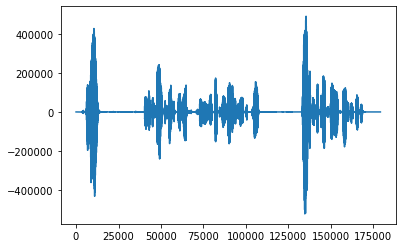

In [21]:
inputs = {resnet_session.get_inputs()[0].name: test_wav.astype(np.float32).reshape(1, 1, -1)}
time.sleep(5)
time_s = time.time()
outs = resnet_session.run(None, inputs)[0]
time_e = time.time()
print(time_e - time_s)
plt.plot(outs[0, 0])

5.924440622329712


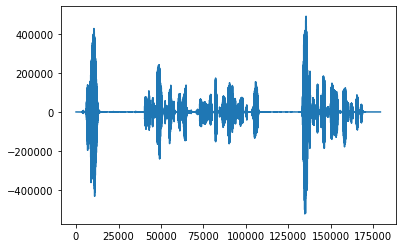

In [23]:
model.cpu()
model.eval()
# static_model = torch.jit.trace(model, torch.randn(1, 1, 64000))
input_tensor = torch.from_numpy(test_wav.astype(np.float32).reshape(1, 1, -1))
time.sleep(5)
time_s = time.time()
with torch.no_grad():
    outs = model(input_tensor)
time_e = time.time()
print(time_e - time_s)
plt.plot(outs.detach().numpy()[0, 0])

In [15]:
len(test_wav) // 16000

11